In [112]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import LabelEncoder

In [113]:
new_1 = pd.read_csv('training_set_features.csv')
new_2 = pd.read_csv('training_set_labels.csv')
new_2

,respondent_id,xyz_vaccine,seasonal_vaccine
0,0,0,0
1,1,0,1
2,2,0,0
3,3,0,1
4,4,0,0
...,...,...,...
26702,26702,0,0
26703,26703,0,0
26704,26704,0,1
26705,26705,0,0


In [114]:
# new_3 = pd.concat([new_1,new_2], axis=1)
new_3 = pd.merge(new_1,new_2, on='respondent_id')
new_3

,respondent_id,xyz_concern,xyz_knowledge,behavioral_antiviral_meds,behavioral_avoidance,behavioral_face_mask,behavioral_wash_hands,behavioral_large_gatherings,behavioral_outside_home,behavioral_touch_face,...,rent_or_own,employment_status,hhs_geo_region,census_msa,household_adults,household_children,employment_industry,employment_occupation,xyz_vaccine,seasonal_vaccine
0,0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,...,Own,Not in Labor Force,oxchjgsf,Non-MSA,0.0,0.0,NaN,NaN,0,0
1,1,3.0,2.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,...,Rent,Employed,bhuqouqj,"MSA, Not Principle City",0.0,0.0,pxcmvdjn,xgwztkwe,0,1
2,2,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,Own,Employed,qufhixun,"MSA, Not Principle City",2.0,0.0,rucpziij,xtkaffoo,0,0
3,3,1.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,...,Rent,Not in Labor Force,lrircsnp,"MSA, Principle City",0.0,0.0,NaN,NaN,0,1
4,4,2.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,...,Own,Employed,qufhixun,"MSA, Not Principle City",1.0,0.0,wxleyezf,emcorrxb,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26702,26702,2.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,...,Own,Not in Labor Force,qufhixun,Non-MSA,0.0,0.0,NaN,NaN,0,0
26703,26703,1.0,2.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,...,Rent,Employed,lzgpxyit,"MSA, Principle City",1.0,0.0,fcxhlnwr,cmhcxjea,0,0
26704,26704,2.0,2.0,0.0,1.0,1.0,1.0,1.0,0.0,1.0,...,Own,NaN,lzgpxyit,"MSA, Not Principle City",0.0,0.0,NaN,NaN,0,1
26705,26705,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,...,Rent,Employed,lrircsnp,Non-MSA,1.0,0.0,fcxhlnwr,haliazsg,0,0


# data cleaning

In [115]:
new_4 = new_3.copy()

In [116]:
new_4.isnull().sum().sort_values()
# new_4.employment_occupation.unique()
new_4.drop(columns=['employment_occupation','employment_industry','health_insurance'],inplace=True)

In [117]:
new_4.select_dtypes(include=['object']).isnull().sum()

age_group               0
education            1407
race                    0
sex                     0
income_poverty       4423
marital_status       1408
rent_or_own          2042
employment_status    1463
hhs_geo_region          0
census_msa              0
dtype: int64

In [118]:
new_4.age_group.isnull().sum()

0

In [119]:
def convert_age_group(age_group):
        # Split the string by ' - ' to get the lower and upper bounds
        parts = age_group.replace(' Years', '').split(' - ')
        if len(parts) == 2:
            return (float(parts[0]) + float(parts[1])) / 2
        # Handle the '65+ Years' case
        elif '65+' in age_group:
            return 65.0
        else:
            return None

In [120]:
new_5 = new_4.copy()
new_5.age_group = new_5.age_group.apply(convert_age_group)

In [121]:
new_5.select_dtypes(include=['object'])

,education,race,sex,income_poverty,marital_status,rent_or_own,employment_status,hhs_geo_region,census_msa
0,< 12 Years,White,Female,Below Poverty,Not Married,Own,Not in Labor Force,oxchjgsf,Non-MSA
1,12 Years,White,Male,Below Poverty,Not Married,Rent,Employed,bhuqouqj,"MSA, Not Principle City"
2,College Graduate,White,Male,"<= $75,000, Above Poverty",Not Married,Own,Employed,qufhixun,"MSA, Not Principle City"
3,12 Years,White,Female,Below Poverty,Not Married,Rent,Not in Labor Force,lrircsnp,"MSA, Principle City"
4,Some College,White,Female,"<= $75,000, Above Poverty",Married,Own,Employed,qufhixun,"MSA, Not Principle City"
...,...,...,...,...,...,...,...,...,...
26702,Some College,White,Female,"<= $75,000, Above Poverty",Not Married,Own,Not in Labor Force,qufhixun,Non-MSA
26703,College Graduate,White,Male,"<= $75,000, Above Poverty",Not Married,Rent,Employed,lzgpxyit,"MSA, Principle City"
26704,Some College,White,Female,NaN,Not Married,Own,NaN,lzgpxyit,"MSA, Not Principle City"
26705,Some College,Hispanic,Female,"<= $75,000, Above Poverty",Married,Rent,Employed,lrircsnp,Non-MSA


In [122]:
new_6 = new_5.copy()
new_6.select_dtypes(include=['object']).isnull().sum()
new_6.hhs_geo_region.unique()

array(['oxchjgsf', 'bhuqouqj', 'qufhixun', 'lrircsnp', 'atmpeygn',
       'lzgpxyit', 'fpwskwrf', 'mlyzmhmf', 'dqpwygqj', 'kbazzjca'],
      dtype=object)

In [123]:
new_6.race = new_6.race.replace({'White':0, 'Black':1, 'Other or Multiple':2, 'Hispanic':3})
new_6.sex = new_6.sex.replace({'Male':0, 'Female':1})
# new_7.employment_status = new_7.employment_status.replace()
new_6.hhs_geo_region = new_6.hhs_geo_region.replace({'oxchjgsf':0, 'bhuqouqj':1, 'qufhixun':2, 'lrircsnp':3, 'atmpeygn':4,
       'lzgpxyit':5, 'fpwskwrf':6, 'mlyzmhmf':7, 'dqpwygqj':8, 'kbazzjca':9})    
new_6.census_msa = new_6.census_msa.replace({'Non-MSA':0, 'MSA, Not Principle  City':1, 'MSA, Principle City':2}) 
# new_7.employment_industry = new_7.employment_industry.replace()    
# new_7.employment_occupation = new_7.employment_occupation.replace()
new_6.select_dtypes(include=['object']).isnull().sum()

education            1407
income_poverty       4423
marital_status       1408
rent_or_own          2042
employment_status    1463
dtype: int64

In [124]:
new_6.isnull().sum().sort_values()
new_7 = new_6.copy()
new_7 = new_7.dropna(subset=['education','income_poverty','marital_status','rent_or_own','employment_status'])
new_7

,respondent_id,xyz_concern,xyz_knowledge,behavioral_antiviral_meds,behavioral_avoidance,behavioral_face_mask,behavioral_wash_hands,behavioral_large_gatherings,behavioral_outside_home,behavioral_touch_face,...,income_poverty,marital_status,rent_or_own,employment_status,hhs_geo_region,census_msa,household_adults,household_children,xyz_vaccine,seasonal_vaccine
0,0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,...,Below Poverty,Not Married,Own,Not in Labor Force,0,0,0.0,0.0,0,0
1,1,3.0,2.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,...,Below Poverty,Not Married,Rent,Employed,1,1,0.0,0.0,0,1
2,2,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,"<= $75,000, Above Poverty",Not Married,Own,Employed,2,1,2.0,0.0,0,0
3,3,1.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,...,Below Poverty,Not Married,Rent,Not in Labor Force,3,2,0.0,0.0,0,1
4,4,2.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,...,"<= $75,000, Above Poverty",Married,Own,Employed,2,1,1.0,0.0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26701,26701,2.0,2.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,...,"> $75,000",Not Married,Rent,Not in Labor Force,6,2,3.0,0.0,0,0
26702,26702,2.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,...,"<= $75,000, Above Poverty",Not Married,Own,Not in Labor Force,2,0,0.0,0.0,0,0
26703,26703,1.0,2.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,...,"<= $75,000, Above Poverty",Not Married,Rent,Employed,5,2,1.0,0.0,0,0
26705,26705,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,...,"<= $75,000, Above Poverty",Married,Rent,Employed,3,0,1.0,0.0,0,0


In [125]:
new_7.select_dtypes(include=['object']).isnull().sum()
new_7.employment_status.unique()

array(['Not in Labor Force', 'Employed', 'Unemployed'], dtype=object)

In [126]:
new_7['education'] = new_7['education'].replace({'< 12 Years':0, '12 Years':1, 'College Graduate':2, 'Some College':3})
new_7['income_poverty'] = new_7['income_poverty'].replace({'Below Poverty':0, '<= $75,000, Above Poverty':1, '> $75,000':2})
new_7['marital_status'] = new_7['marital_status'].replace({'Not Married':0, 'Married':1})
new_7['rent_or_own'] = new_7['rent_or_own'].replace({'Own':0, 'Rent':1})
new_7['employment_status'] = new_7['employment_status'].replace({'Not in Labor Force':0, 'Employed':1, 'Unemployed':2})


In [127]:
new_8 = new_7.copy()
new_8.isnull().sum().sort_values(ascending=False).head(29)

doctor_recc_xyz                1613
doctor_recc_seasonal           1613
chronic_med_condition           162
behavioral_avoidance            143
behavioral_touch_face            89
xyz_knowledge                    71
opinion_xyz_vacc_effective       62
behavioral_large_gatherings      59
behavioral_antiviral_meds        48
behavioral_outside_home          46
xyz_concern                      38
opinion_xyz_risk                 26
opinion_seas_vacc_effective      24
behavioral_wash_hands            21
opinion_seas_risk                18
health_worker                    11
behavioral_face_mask             10
opinion_xyz_sick_from_vacc        7
opinion_seas_sick_from_vacc       7
household_adults                  6
household_children                6
child_under_6_months              2
xyz_vaccine                       0
rent_or_own                       0
census_msa                        0
hhs_geo_region                    0
employment_status                 0
respondent_id               

In [128]:
# sns.heatmap(new_8, cmap='viridis', yticklabels=False)
# new_8.age_group.isnull().sum()
new_9 = new_8.copy()
new_9 = new_9.dropna(subset=['child_under_6_months','household_adults','household_children','opinion_seas_sick_from_vacc','opinion_xyz_sick_from_vacc','behavioral_face_mask','health_worker','opinion_seas_risk'])
new_9

,respondent_id,xyz_concern,xyz_knowledge,behavioral_antiviral_meds,behavioral_avoidance,behavioral_face_mask,behavioral_wash_hands,behavioral_large_gatherings,behavioral_outside_home,behavioral_touch_face,...,income_poverty,marital_status,rent_or_own,employment_status,hhs_geo_region,census_msa,household_adults,household_children,xyz_vaccine,seasonal_vaccine
0,0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,...,0,0,0,0,0,0,0.0,0.0,0,0
1,1,3.0,2.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,...,0,0,1,1,1,1,0.0,0.0,0,1
2,2,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,1,0,0,1,2,1,2.0,0.0,0,0
3,3,1.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,...,0,0,1,0,3,2,0.0,0.0,0,1
4,4,2.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,...,1,1,0,1,2,1,1.0,0.0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26701,26701,2.0,2.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,...,2,0,1,0,6,2,3.0,0.0,0,0
26702,26702,2.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,...,1,0,0,0,2,0,0.0,0.0,0,0
26703,26703,1.0,2.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,...,1,0,1,1,5,2,1.0,0.0,0,0
26705,26705,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,...,1,1,1,1,3,0,1.0,0.0,0,0


In [129]:
new_10 = new_9.copy()
new_10.dropna(inplace=True)
new_10

,respondent_id,xyz_concern,xyz_knowledge,behavioral_antiviral_meds,behavioral_avoidance,behavioral_face_mask,behavioral_wash_hands,behavioral_large_gatherings,behavioral_outside_home,behavioral_touch_face,...,income_poverty,marital_status,rent_or_own,employment_status,hhs_geo_region,census_msa,household_adults,household_children,xyz_vaccine,seasonal_vaccine
0,0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,...,0,0,0,0,0,0,0.0,0.0,0,0
1,1,3.0,2.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,...,0,0,1,1,1,1,0.0,0.0,0,1
3,3,1.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,...,0,0,1,0,3,2,0.0,0.0,0,1
4,4,2.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,...,1,1,0,1,2,1,1.0,0.0,0,0
5,5,3.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,...,1,1,0,1,4,2,2.0,3.0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26700,26700,3.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,...,2,1,0,0,5,2,1.0,0.0,0,1
26701,26701,2.0,2.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,...,2,0,1,0,6,2,3.0,0.0,0,0
26702,26702,2.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,...,1,0,0,0,2,0,0.0,0.0,0,0
26703,26703,1.0,2.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,...,1,0,1,1,5,2,1.0,0.0,0,0


In [130]:
new_10.isnull().sum().sum()
new_10.columns

Index(['respondent_id', 'xyz_concern', 'xyz_knowledge',
       'behavioral_antiviral_meds', 'behavioral_avoidance',
       'behavioral_face_mask', 'behavioral_wash_hands',
       'behavioral_large_gatherings', 'behavioral_outside_home',
       'behavioral_touch_face', 'doctor_recc_xyz', 'doctor_recc_seasonal',
       'chronic_med_condition', 'child_under_6_months', 'health_worker',
       'opinion_xyz_vacc_effective', 'opinion_xyz_risk',
       'opinion_xyz_sick_from_vacc', 'opinion_seas_vacc_effective',
       'opinion_seas_risk', 'opinion_seas_sick_from_vacc', 'age_group',
       'education', 'race', 'sex', 'income_poverty', 'marital_status',
       'rent_or_own', 'employment_status', 'hhs_geo_region', 'census_msa',
       'household_adults', 'household_children', 'xyz_vaccine',
       'seasonal_vaccine'],
      dtype='object')

<class 'pandas.core.frame.DataFrame'>
Index: 19642 entries, 0 to 26706
Data columns (total 35 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   respondent_id                19642 non-null  int64  
 1   xyz_concern                  19642 non-null  float64
 2   xyz_knowledge                19642 non-null  float64
 3   behavioral_antiviral_meds    19642 non-null  float64
 4   behavioral_avoidance         19642 non-null  float64
 5   behavioral_face_mask         19642 non-null  float64
 6   behavioral_wash_hands        19642 non-null  float64
 7   behavioral_large_gatherings  19642 non-null  float64
 8   behavioral_outside_home      19642 non-null  float64
 9   behavioral_touch_face        19642 non-null  float64
 10  doctor_recc_xyz              19642 non-null  float64
 11  doctor_recc_seasonal         19642 non-null  float64
 12  chronic_med_condition        19642 non-null  float64
 13  child_under_6_months 

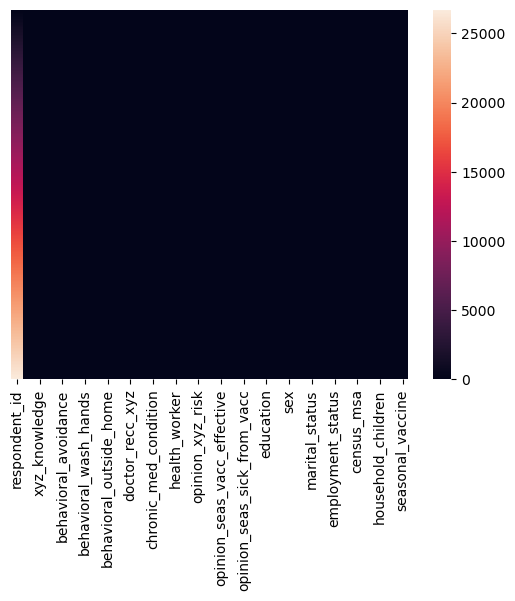

In [131]:
sns.heatmap(new_10,yticklabels=False)
new_10.info()

In [132]:
# sns.pairplot(new_10)
correlation_matrix = new_10.corr()
high_corr = correlation_matrix[correlation_matrix > 0]
high_corr
# correlation_matrix

,respondent_id,xyz_concern,xyz_knowledge,behavioral_antiviral_meds,behavioral_avoidance,behavioral_face_mask,behavioral_wash_hands,behavioral_large_gatherings,behavioral_outside_home,behavioral_touch_face,...,income_poverty,marital_status,rent_or_own,employment_status,hhs_geo_region,census_msa,household_adults,household_children,xyz_vaccine,seasonal_vaccine
respondent_id,1.000000,0.015039,0.003837,NaN,0.008889,NaN,0.013715,0.004926,0.010465,0.004628,...,NaN,0.007461,NaN,NaN,0.000633,NaN,0.002571,NaN,NaN,NaN
xyz_concern,0.015039,1.000000,0.059023,0.090782,0.235204,0.162740,0.293807,0.264525,0.252513,0.249776,...,NaN,0.037674,0.001543,NaN,0.031234,NaN,NaN,0.048792,0.134136,0.167132
xyz_knowledge,0.003837,0.059023,1.000000,NaN,0.071382,0.037583,0.084454,NaN,NaN,0.085656,...,0.242343,0.119238,NaN,0.073057,NaN,0.037221,0.012606,0.053608,0.125878,0.126241
behavioral_antiviral_meds,NaN,0.090782,NaN,1.000000,0.045012,0.145122,0.059663,0.106117,0.124120,0.064138,...,NaN,NaN,0.072057,0.020231,0.031362,0.008779,0.041534,0.080335,0.036202,NaN
behavioral_avoidance,0.008889,0.235204,0.071382,0.045012,1.000000,0.061104,0.336035,0.227655,0.223418,0.328064,...,0.022466,0.056189,NaN,NaN,0.007986,NaN,0.013944,0.039898,0.044053,0.075936
behavioral_face_mask,NaN,0.162740,0.037583,0.145122,0.061104,1.000000,0.077821,0.181502,0.167205,0.107283,...,NaN,NaN,0.053974,NaN,0.017318,0.020092,0.016216,0.005850,0.075303,0.051242
behavioral_wash_hands,0.013715,0.293807,0.084454,0.059663,0.336035,0.077821,1.000000,0.193549,0.191407,0.365312,...,0.003170,0.048730,NaN,NaN,0.010333,NaN,0.006272,0.041377,0.075384,0.113927
behavioral_large_gatherings,0.004926,0.264525,NaN,0.106117,0.227655,0.181502,0.193549,1.000000,0.587728,0.244823,...,NaN,NaN,0.055086,NaN,0.042970,NaN,NaN,NaN,0.020589,0.067907
behavioral_outside_home,0.010465,0.252513,NaN,0.124120,0.223418,0.167205,0.191407,0.587728,1.000000,0.262231,...,NaN,NaN,0.072339,NaN,0.051228,NaN,NaN,NaN,0.017272,0.051676
behavioral_touch_face,0.004628,0.249776,0.085656,0.064138,0.328064,0.107283,0.365312,0.244823,0.262231,1.000000,...,NaN,0.038495,NaN,NaN,0.008304,NaN,NaN,0.020962,0.071344,0.116315


In [133]:
high_corr['xyz_vaccine'].sort_values(ascending=False).head(34)

xyz_vaccine                    1.000000
doctor_recc_xyz                0.396932
seasonal_vaccine               0.388223
opinion_xyz_risk               0.355359
opinion_seas_risk              0.278787
opinion_xyz_vacc_effective     0.272866
doctor_recc_seasonal           0.211108
health_worker                  0.187458
opinion_seas_vacc_effective    0.185614
xyz_concern                    0.134136
xyz_knowledge                  0.125878
chronic_med_condition          0.105628
opinion_xyz_sick_from_vacc     0.082710
behavioral_wash_hands          0.075384
behavioral_face_mask           0.075303
child_under_6_months           0.074877
behavioral_touch_face          0.071344
income_poverty                 0.056383
marital_status                 0.052368
age_group                      0.046965
behavioral_avoidance           0.044053
behavioral_antiviral_meds      0.036202
education                      0.029867
sex                            0.025226
behavioral_large_gatherings    0.020589


In [134]:
high_corr['seasonal_vaccine'].sort_values(ascending=False)

seasonal_vaccine               1.000000
opinion_seas_risk              0.415801
xyz_vaccine                    0.388223
doctor_recc_seasonal           0.367269
opinion_seas_vacc_effective    0.365565
age_group                      0.267467
opinion_xyz_risk               0.233296
opinion_xyz_vacc_effective     0.215492
doctor_recc_xyz                0.202109
chronic_med_condition          0.169972
xyz_concern                    0.167132
health_worker                  0.136564
xyz_knowledge                  0.126241
behavioral_touch_face          0.116315
behavioral_wash_hands          0.113927
sex                            0.077277
behavioral_avoidance           0.075936
income_poverty                 0.072386
behavioral_large_gatherings    0.067907
marital_status                 0.056396
behavioral_outside_home        0.051676
behavioral_face_mask           0.051242
opinion_xyz_sick_from_vacc     0.030772
education                      0.028035
child_under_6_months           0.017213


Choosing from only those features with +ve correlation

# Logistic regression

xyz_vaccine

In [135]:
from sklearn.model_selection import train_test_split
new_xyz = new_10.copy()
new_xyz = new_xyz.drop(columns=['respondent_id','race','rent_or_own','employment_status','hhs_geo_region','household_children'],axis=1)
new_xyz.columns
# new_xyz_1 = new_10.drop(columns=['race','rent_or_own','employment_status','hhs_geo_region','household_children','marital_status','census_msa','household_adults'],axis=1)

Index(['xyz_concern', 'xyz_knowledge', 'behavioral_antiviral_meds',
       'behavioral_avoidance', 'behavioral_face_mask', 'behavioral_wash_hands',
       'behavioral_large_gatherings', 'behavioral_outside_home',
       'behavioral_touch_face', 'doctor_recc_xyz', 'doctor_recc_seasonal',
       'chronic_med_condition', 'child_under_6_months', 'health_worker',
       'opinion_xyz_vacc_effective', 'opinion_xyz_risk',
       'opinion_xyz_sick_from_vacc', 'opinion_seas_vacc_effective',
       'opinion_seas_risk', 'opinion_seas_sick_from_vacc', 'age_group',
       'education', 'sex', 'income_poverty', 'marital_status', 'census_msa',
       'household_adults', 'xyz_vaccine', 'seasonal_vaccine'],
      dtype='object')

In [136]:
X_tr_xyz, x_ts_xyz, Y_tr_xyz, y_ts_xyz = train_test_split(new_xyz.drop(['xyz_vaccine'],axis=1), new_xyz['xyz_vaccine'], test_size=0.25, random_state=5)
# X_tr_xyz, x_ts_xyz, Y_tr_xyz, y_ts_xyz = train_test_split(new_xyz_1.drop(['xyz_vaccine'],axis=1), new_xyz_1['xyz_vaccine'], test_size=0.25, random_state=5)
X_tr_xyz

,xyz_concern,xyz_knowledge,behavioral_antiviral_meds,behavioral_avoidance,behavioral_face_mask,behavioral_wash_hands,behavioral_large_gatherings,behavioral_outside_home,behavioral_touch_face,doctor_recc_xyz,...,opinion_seas_risk,opinion_seas_sick_from_vacc,age_group,education,sex,income_poverty,marital_status,census_msa,household_adults,seasonal_vaccine
8690,1.0,2.0,0.0,1.0,0.0,1.0,1.0,1.0,1.0,0.0,...,4.0,1.0,65.0,2,0,1,1,2,1.0,1
14396,2.0,2.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0,...,5.0,1.0,39.5,2,1,2,1,1,1.0,1
23500,3.0,1.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,0.0,...,4.0,4.0,65.0,3,1,2,0,1,0.0,1
16888,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,...,1.0,1.0,59.5,1,0,2,1,0,1.0,0
9732,3.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,...,5.0,1.0,65.0,1,1,1,0,1,0.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1394,1.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,...,2.0,2.0,26.0,2,1,2,0,1,3.0,0
7499,2.0,1.0,0.0,1.0,0.0,1.0,1.0,1.0,1.0,0.0,...,2.0,4.0,39.5,3,0,2,0,2,1.0,0
4105,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,1.0,...,1.0,1.0,59.5,2,0,2,0,2,0.0,0
25323,2.0,1.0,0.0,1.0,0.0,1.0,1.0,1.0,1.0,0.0,...,2.0,1.0,59.5,1,0,0,1,0,2.0,0


In [137]:
x_ts_xyz

,xyz_concern,xyz_knowledge,behavioral_antiviral_meds,behavioral_avoidance,behavioral_face_mask,behavioral_wash_hands,behavioral_large_gatherings,behavioral_outside_home,behavioral_touch_face,doctor_recc_xyz,...,opinion_seas_risk,opinion_seas_sick_from_vacc,age_group,education,sex,income_poverty,marital_status,census_msa,household_adults,seasonal_vaccine
13525,2.0,1.0,0.0,1.0,0.0,1.0,1.0,1.0,1.0,0.0,...,4.0,4.0,65.0,2,0,2,1,1,1.0,1
24043,1.0,2.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,...,4.0,1.0,39.5,2,1,2,1,1,1.0,1
21338,1.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,...,4.0,2.0,39.5,2,0,1,1,1,1.0,1
11354,2.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,1.0,1.0,39.5,3,1,1,0,1,1.0,0
5345,3.0,1.0,0.0,1.0,0.0,1.0,1.0,1.0,1.0,0.0,...,4.0,5.0,26.0,3,1,0,0,1,1.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13362,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,...,2.0,1.0,26.0,2,1,2,1,1,1.0,0
2807,1.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,...,1.0,1.0,65.0,1,1,1,0,2,0.0,1
16569,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,...,4.0,1.0,65.0,3,1,1,0,1,0.0,1
12594,1.0,2.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,...,2.0,2.0,39.5,2,0,2,1,1,1.0,0


In [138]:
y_ts_xyz

13525    0
24043    1
21338    0
11354    1
5345     0
        ..
13362    0
2807     0
16569    1
12594    0
6387     0
Name: xyz_vaccine, Length: 4911, dtype: int64

In [139]:
from sklearn.linear_model import LogisticRegression

# Final for xyz_vaccine

In [140]:
lr_xyz_1 = LogisticRegression(random_state=0, C=0.25, fit_intercept=True).fit(X_tr_xyz,Y_tr_xyz)

c:\Users\3008h\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [141]:
lr_xyz_1.fit(X_tr_xyz,Y_tr_xyz)
lr_xyz_1.predict(X_tr_xyz)
lr_xyz_1.score(X_tr_xyz,Y_tr_xyz)

c:\Users\3008h\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


0.8487543276084448

In [142]:
xyz_final = lr_xyz_1.predict(x_ts_xyz)
lr_xyz_1.score(x_ts_xyz,y_ts_xyz)

0.8440236204439014

# for probability estimation over entire data set

In [143]:
for_prob = lr_xyz_1.predict(new_xyz.drop(['xyz_vaccine'],axis=1))
for_prob
lr_xyz_1.score(new_xyz.drop(['xyz_vaccine'],axis=1),new_xyz['xyz_vaccine'])
xyz_prob = lr_xyz_1.predict_proba(new_xyz.drop(['xyz_vaccine'],axis=1))

seasonal_flu_vaccine

In [144]:
new_sf = new_10.copy()
new_sf = new_sf.drop(columns=['respondent_id','behavioral_antiviral_meds','race','rent_or_own','employment_status','hhs_geo_region','census_msa','household_children','household_adults','sex','behavioral_avoidance','income_poverty','behavioral_large_gatherings', 'behavioral_outside_home','marital_status','behavioral_face_mask'],axis=1)
new_sf.columns

Index(['xyz_concern', 'xyz_knowledge', 'behavioral_wash_hands',
       'behavioral_touch_face', 'doctor_recc_xyz', 'doctor_recc_seasonal',
       'chronic_med_condition', 'child_under_6_months', 'health_worker',
       'opinion_xyz_vacc_effective', 'opinion_xyz_risk',
       'opinion_xyz_sick_from_vacc', 'opinion_seas_vacc_effective',
       'opinion_seas_risk', 'opinion_seas_sick_from_vacc', 'age_group',
       'education', 'xyz_vaccine', 'seasonal_vaccine'],
      dtype='object')

In [145]:
new_sf

,xyz_concern,xyz_knowledge,behavioral_wash_hands,behavioral_touch_face,doctor_recc_xyz,doctor_recc_seasonal,chronic_med_condition,child_under_6_months,health_worker,opinion_xyz_vacc_effective,opinion_xyz_risk,opinion_xyz_sick_from_vacc,opinion_seas_vacc_effective,opinion_seas_risk,opinion_seas_sick_from_vacc,age_group,education,xyz_vaccine,seasonal_vaccine
0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,3.0,1.0,2.0,2.0,1.0,2.0,59.5,0,0,0
1,3.0,2.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,5.0,4.0,4.0,4.0,2.0,4.0,39.5,1,0,1
3,1.0,1.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,3.0,3.0,5.0,5.0,4.0,1.0,65.0,1,0,1
4,2.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,3.0,3.0,2.0,3.0,1.0,4.0,49.5,3,0,0
5,3.0,1.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,5.0,2.0,1.0,5.0,4.0,4.0,65.0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26700,3.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,4.0,2.0,5.0,5.0,4.0,5.0,59.5,1,0,1
26701,2.0,2.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,4.0,2.0,4.0,4.0,2.0,4.0,26.0,2,0,0
26702,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,1.0,1.0,5.0,2.0,2.0,65.0,3,0,0
26703,1.0,2.0,1.0,0.0,1.0,1.0,0.0,0.0,1.0,4.0,2.0,2.0,5.0,1.0,1.0,26.0,2,0,0


In [146]:
X_tr_sf, x_ts_sf, Y_tr_sf, y_ts_sf = train_test_split(new_sf.drop(['seasonal_vaccine'],axis=1), new_sf['seasonal_vaccine'], test_size=0.25, random_state=5)
# X_tr_xyz, x_ts_xyz, Y_tr_xyz, y_ts_xyz = train_test_split(new_xyz_1.drop(['xyz_vaccine'],axis=1), new_xyz_1['xyz_vaccine'], test_size=0.25, random_state=5)
X_tr_sf

,xyz_concern,xyz_knowledge,behavioral_wash_hands,behavioral_touch_face,doctor_recc_xyz,doctor_recc_seasonal,chronic_med_condition,child_under_6_months,health_worker,opinion_xyz_vacc_effective,opinion_xyz_risk,opinion_xyz_sick_from_vacc,opinion_seas_vacc_effective,opinion_seas_risk,opinion_seas_sick_from_vacc,age_group,education,xyz_vaccine
8690,1.0,2.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,4.0,1.0,1.0,4.0,4.0,1.0,65.0,2,0
14396,2.0,2.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,5.0,5.0,4.0,5.0,5.0,1.0,39.5,2,1
23500,3.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,2.0,4.0,5.0,4.0,4.0,65.0,3,0
16888,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,59.5,1,0
9732,3.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,1.0,3.0,5.0,5.0,3.0,5.0,1.0,65.0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1394,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,4.0,2.0,2.0,4.0,2.0,2.0,26.0,2,0
7499,2.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,5.0,2.0,4.0,5.0,2.0,4.0,39.5,3,0
4105,0.0,1.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,4.0,1.0,1.0,1.0,1.0,1.0,59.5,2,0
25323,2.0,1.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,4.0,1.0,4.0,4.0,2.0,1.0,59.5,1,0


# Final seasonal_flu_vaccine

In [147]:
lr_sf = LogisticRegression(random_state=0,C=0.5, fit_intercept=True).fit(X_tr_sf,Y_tr_sf)

c:\Users\3008h\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [148]:
lr_sf.predict(X_tr_sf)

array([1, 1, 1, ..., 0, 0, 1], dtype=int64)

In [149]:
np.mean(abs(lr_sf.predict(X_tr_sf)-Y_tr_sf))

0.19699952481162175

In [150]:
lr_sf.score(X_tr_sf,Y_tr_sf)

0.8030004751883782

In [151]:
final_sf = lr_sf.predict(x_ts_sf)

In [152]:
lr_sf.score(x_ts_sf,y_ts_sf)

0.7975972307065771

# for probability estimation over entire dataset

In [153]:
for_prob_sf = lr_sf.predict(new_sf.drop(['seasonal_vaccine'],axis=1))
for_prob_sf
lr_sf.score(new_sf.drop(['seasonal_vaccine'],axis=1),new_sf['seasonal_vaccine'])
sf_prob = lr_sf.predict_proba(new_sf.drop(['seasonal_vaccine'],axis=1))

# Evaluation

In [154]:
from sklearn.metrics import roc_curve, roc_auc_score

* xyz_vaccine

In [155]:
prob_xyz = lr_xyz_1.predict_proba(x_ts_xyz)
prob_xyz

array([[0.87711946, 0.12288054],
       [0.10183411, 0.89816589],
       [0.69330222, 0.30669778],
       ...,
       [0.27473204, 0.72526796],
       [0.93968092, 0.06031908],
       [0.60994147, 0.39005853]])

In [156]:
fpr_xyz, tpr_xyz, thresh_xyz = roc_curve(y_ts_xyz, prob_xyz[:,1], pos_label=1)
random_probs_xyz = [0 for i in range(len(y_ts_xyz))]
p_fpr_xyz, p_tpr_xyz, _ = roc_curve(y_ts_sf, random_probs_xyz, pos_label=1)

In [157]:
auc_score_xyz = roc_auc_score(y_ts_xyz, prob_xyz[:,1])
auc_score_xyz

0.866203018742274

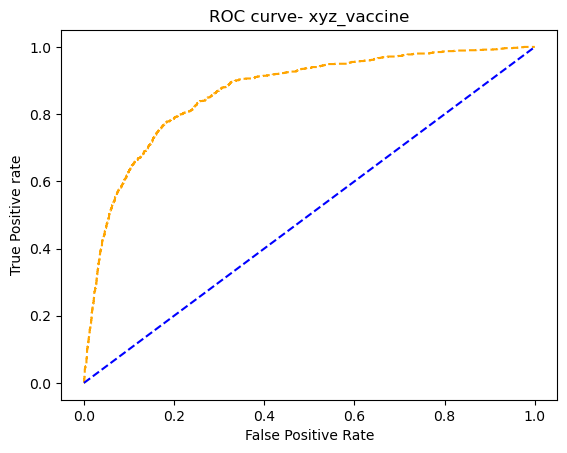

In [158]:
plt.plot(fpr_xyz, tpr_xyz, linestyle='--',color='orange')
plt.plot(p_fpr_xyz, p_tpr_xyz, linestyle='--', color='blue')
plt.title('ROC curve- xyz_vaccine')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive rate')
plt.show();

* seasonal_flu_vaccine

In [159]:
prob_sf = lr_sf.predict_proba(x_ts_sf)
prob_sf

array([[0.11444574, 0.88555426],
       [0.03046141, 0.96953859],
       [0.62830166, 0.37169834],
       ...,
       [0.03799992, 0.96200008],
       [0.84917155, 0.15082845],
       [0.599017  , 0.400983  ]])

In [160]:
fpr_sf, tpr_sf, thresh_sf = roc_curve(y_ts_sf, prob_sf[:,1], pos_label=1)
random_probs_sf = [0 for i in range(len(y_ts_sf))]
p_fpr_sf, p_tpr_sf, _ = roc_curve(y_ts_sf, random_probs_sf, pos_label=1)

In [161]:
auc_score_sf = roc_auc_score(y_ts_sf, prob_sf[:,1])
auc_score_sf

0.8707629181260298

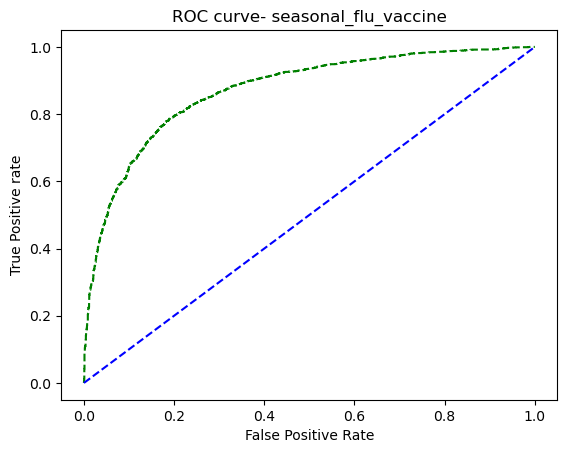

In [162]:
plt.plot(fpr_sf, tpr_sf, linestyle='--',color='green')
plt.plot(p_fpr_sf, p_tpr_sf, linestyle='--', color='blue')
plt.title('ROC curve- seasonal_flu_vaccine')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive rate')
plt.show();

# AUC- ROC MEAN

In [163]:
auc_roc_mean = (auc_score_xyz + auc_score_sf)/2
print(f"auc_score_mean: {auc_roc_mean}")

auc_score_mean: 0.868482968434152


# ADDING TO THE FILE

In [164]:
xyz_sub_file = xyz_prob[:,1]
sf_sub_file = sf_prob[:,1]

subm = pd.DataFrame({
    'respondent_id' : new_10['respondent_id'],
    'xyz_vaccine': np.round(xyz_sub_file,1),
    'seasonal_vaccine' : np.round(sf_sub_file,1)
})

subm.to_csv('submission_format.csv',index=False)
